Если вы дошли до этого момента, то уже сделали половину пути. Каждую ячейку можно выполнить, нажав Shift+Enter или кнопку Run на панели сверху. Всё, что она выведет будет показано ниже этой ячейки. Также каждая ячейка выводит результат последней строки.

Ваша задача написать код, в местах помеченных "### ваш код здесь" так, чтобы всё работало правильно

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [1]:
# Подробнее со следующими библиотеками вы познакомитесь на следующих занятиях. 
# Для решения задания потребуется лишь знания чистого python.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

### K-means

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги. Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться.

Сгенерируем искусственно 3 кластера случайных точек.

In [7]:
# Параметры кластеров
num_clusters = 3
cluster_size = 20
color_dict = np.array(['r','g','b','c','m','orange','y'])

# Центры кластеров
means_x = [1., 1.2, 0.8]
means_y = [0.5, 0.6, 0.5]

def generate_points(show = True):
    points = []


    # Разброс
    std = 0.1

    for k in range(num_clusters):
        for i in range(cluster_size):
            x_i = np.random.normal(loc=means_x[k], scale=std)
            y_i = np.random.normal(loc=means_y[k], scale=std)
            points.append((x_i, y_i))
    
    values = []
    for x in range(num_clusters):
        values += [x] * cluster_size
        
    colors = color_dict[values]
    
    if show:
        points_x = list(map(lambda x: x[0], points))
        points_y = list(map(lambda x: x[1], points))
        plt.scatter(x=points_x, y=points_y, c=colors)
    
    return points

Каждый цвет - отдельный кластер. Но у нас не будет этих цветов, а только координаты точек.

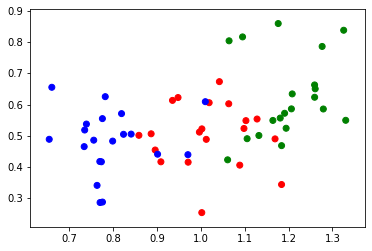

In [8]:
points = generate_points()

In [9]:
# Код алгоритма
def k_means(points, num_clusters):
    """
    @param points: список из пар координат точек
    @param num_clusters: число кластеров, на которое необходимо поделить

    @return: номера кластеров и их центры
    """
    num_points = len(points)
    
    # Выбираем начальные центры кластеров (просто первые num_clusters точек)
    centers = points[:num_clusters]
    
    # В качестве результата будет массив с номерами кластеров для каждой точки
    result = [-1] * num_points
    
    # Предыдущая копия массива result, чтобы сравнивать, поменялось что-то или нет
    prev_result = []
    
    # Выведем на экран стартовую ситуацию
    print("Входные данные")
    points_x = list(map(lambda x: x[0], points))
    points_y = list(map(lambda x: x[1], points))
    plt.scatter(x=points_x, y=points_y)
    plt.show()
    
    it_num = 1
    
    # Для работы с методами numpy
    points = np.array(points)
    result = np.array(result)
    
    def dist(x, y):
        return ((x[0]-y[0])**2 + (x[1]-y[1])**2) ** 0.5

    def ClosestCluster(centers, p):
        dists = list(map(lambda x: dist(p, x), centers))
        return np.array(dists).argmin()
    
    # Работаем до тех пор, пока кластеры не перестанут меняться
    while list(result) != list(prev_result):
        prev_result = result
        
        # Определяем каждую точку к кластеру
        result = np.array([ClosestCluster(centers, p) for p in points])

        # Меняем центры кластеров
        for i in range(num_clusters):
            cluster_points = points[np.argwhere(result == i).flatten()]
            centers[i] = tuple(np.mean(cluster_points, axis = 0))
            
        # Выведем то, что у нас получилось
        print("Итерация №{}".format(it_num))
        it_num += 1
        points_x = list(map(lambda x: x[0], points))
        points_y = list(map(lambda x: x[1], points))    
        colors = result
        if num_clusters == 3:
            # Так красивее
            colors = np.array(['r', 'g','b'])[result]
        plt.scatter(x=points_x, y=points_y, c=colors)
        plt.show()
    return result, centers    

Выведем полученный результат

Входные данные


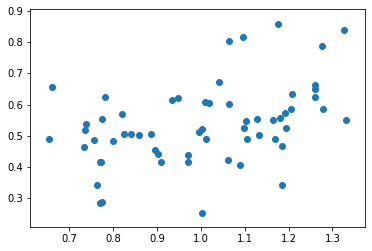

Итерация №1


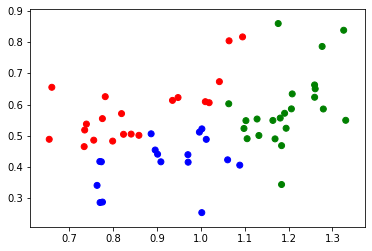

Итерация №2


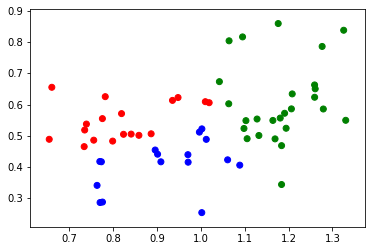

Итерация №3


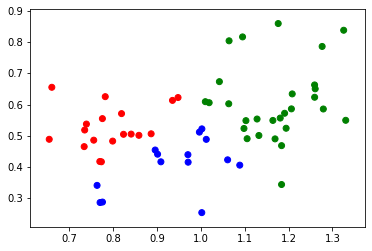

Итерация №4


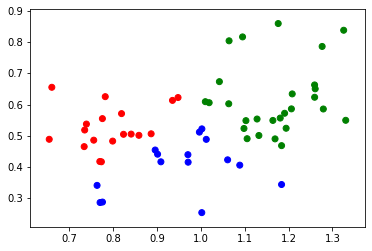

Итерация №5


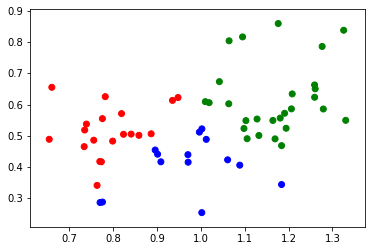

Итерация №6


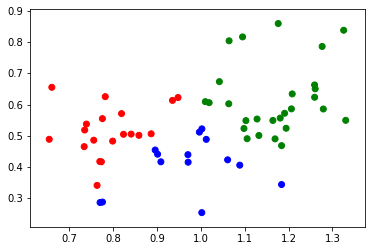

Истинные центры кластеров:
(1.0, 0.5)
(1.2, 0.6)
(0.8, 0.5)
Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:
(0.8, 0.5)
(1.2, 0.6)
(1.0, 0.4)


In [10]:
res, centers = k_means(points, 3)
print("Истинные центры кластеров:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(means_x[i], means_y[i]))
print("Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(centers[i][0], centers[i][1]))

### MSE

Напомним формулу для MSE между двумя массивами длины n. Необходимо проверить, насколько сильно они отличаются:
$$MSE(x, y) = \frac{1}{n}((x_1-y_1)^2+...+(x_n-y_n)^2)$$

In [11]:
def mse(x, y):
    """
    @param x, y: массивы одинаковой длины
    @return: число, результат их MSE
    """
    assert len(x) == len(y)
    x, y = np.array(x), np.array(y)
    return sum((x-y)**2) / len(x)

Проверим на простом примере. Должно получиться 5.0:

In [12]:
x = [1, 3, 2, 4, 5, 6]
y = [2, 4, 3, 5, 6, 1]
mse(x, y)

5.0

Теперь проверим на более сложном примере.  Далее в коде ничего изменять не надо, просто посмотрите, как отличаются ошибки алгоритма, который всегда выдаёт 0, а также более продвинутого алгоритма.

В качестве данных у нас картинки с рукописными цифрами из sklearn. Они небольшого размера, но, в принципе, все числа различимы. Это задача классификации с 10 классами (цифры от 0 до 9).

7


<Figure size 432x288 with 0 Axes>

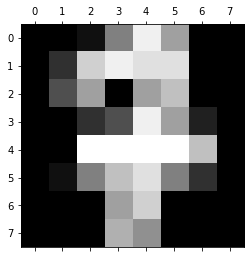

In [13]:
digits = load_digits()
plt.gray()
print(digits.target[17])
plt.matshow(digits.images[17])
plt.show()

Каждая черно-белая картинка это двухмерный массив 8x8, который мы будем использовать в качестве признаков. Первые 1500 цифр возьмём в качестве обучающей выборки, а оставшиеся в качестве тестовой.

In [14]:
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

# Разбиваем на обучающую и тестовую выборки
X_train, y_train = X[:1500], y[:1500]
X_test, y_test = X[1500:], y[1500:]

# Создаём модель
clf = RandomForestClassifier()
# Обучаем модель
clf = clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
# Попробуем посмотреть, правильно ли обучилась модель
print("Истинные значения первых 10 элементов:")
print(y_test[:10])
y_pred = clf.predict(X_test[:10])
print("Предсказанные значения первых 10 элементов:")
print(y_pred)

Истинные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]
Предсказанные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]


Вполне неплохо. Выведем результат ошибки MSE на всей тестовой выборке

In [16]:
y_pred = clf.predict(X_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=2.8114478114478114


А если вместо предсказаний будем всегда выдавать 0

In [17]:
y_pred = [0] * len(y_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=28.754208754208754


Результат на лицо. 

### Алгоритм KNN

In [18]:
from sklearn.base import BaseEstimator, ClassifierMixin

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors = 5, weights = 'uniform'):
        '''
        @param weights: веса, прин. зн. 'uniform', 'distance'
        '''
        assert weights in ['uniform', 'distance']
        assert n_neighbors > 0
        self.weights = weights
        self.n_neighbors = n_neighbors
        self.x = np.array([])
        self.y = np.array([])
        
    def get_params(self, deep=True):
        return {'wieghts' : self.weights, 'n_neighbors': self.n_neighbors}
    
    def distance(self, a, b):
        if type(a) != np.ndarray and type(b) != np.ndarray:
            return abs(a-b)        
        return np.sqrt(sum((a-b)**2))
    
    def fit(self, X : np.array, Y : np.array):
        '''
        @param X: Numpy массив разм. (n, m); 
        n - количество samples; m - количество features
        @param Y: Numpy массив разм. n - true labels
        '''
        assert type(X) == np.ndarray and type(Y) == np.ndarray
        assert len(X.shape) in [1,2] and len(Y.shape) == 1
        assert X.shape[0] == Y.shape[0]
        self.x = np.array(X)
        self.y = np.array(Y)
    
    def find_nbors(self, a):
        inds = list(range(len(self.x)))
        return sorted(inds, key = lambda y: self.distance(a, self.x[y]))[:self.n_neighbors]
        
    def predict(self, X):
        '''
        @param X: Numpy массив разм. (n, m); 
        n - количество samples; m - количество features
        '''
        assert type(X) == np.ndarray
        assert len(X.shape) == len(self.x.shape) == 1 or \
                                        X.shape[1] == self.x.shape[1]
        y = np.zeros(X.shape[0])
                      
        w_func = {
            'uniform' : lambda x, nbors: np.ones(len(nbors)),
            'distance' : lambda x, nbors: list(map(lambda y: 1/self.distance(y, x), nbors))
        } [self.weights]
        
        for i, p in enumerate(X):
            nbors_id = np.array(self.find_nbors(p))
            nbors_y = self.y[nbors_id]
            nbors_x = self.x[nbors_id]
            if all(nbors_x[0] == p):
                y[i] = nbors_y[0]
                continue
            wts = w_func(p, nbors_x)
            y[i] = np.dot(wts, nbors_y).sum() / np.sum(wts)
        
        return list(map(int, map(round, y)))

In [46]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def x_round(arr):
    shp = arr.shape
    arr = np.array(list(map(int, map(round, arr.flatten()))))
    arr = arr.reshape(shp)
    return arr

### Iris dataset

In [123]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [124]:
X = iris.data; Y = iris.target; X.shape, Y.shape

((150, 4), (150,))

In [125]:
# Округлим, чтобы все работало (встроенный knn не работает с float); (умнож. на 10 чтобы сохранить данные)
X = x_round(10*X)
Y = x_round(Y)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [127]:
def train_test_data(clsf, metric = mse):
    clsf.fit(X_train, y_train)
    y_pred = clsf.predict(X_test)
    return metric(y_pred, y_test)

#### MSE

In [128]:
print(train_test_data(kNN(weights='uniform')))
print(train_test_data(kNN(weights='distance')))

0.044444444444444446
0.022222222222222223


In [129]:
print(train_test_data(KNeighborsClassifier(weights='uniform')))
print(train_test_data(KNeighborsClassifier(weights='distance')))

0.044444444444444446
0.022222222222222223


In [130]:
mse(y_test, len(y_test) * [0])

1.8222222222222222

#### Accuracy

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
print(train_test_data(kNN(weights='uniform'), metric = accuracy_score))
print(train_test_data(kNN(weights='distance'), metric = accuracy_score))

0.9555555555555556
0.9777777777777777


In [133]:
print(train_test_data(KNeighborsClassifier(weights='uniform'), metric = accuracy_score))
print(train_test_data(KNeighborsClassifier(weights='distance'), metric = accuracy_score))

0.9555555555555556
0.9777777777777777


#### Boston dataset

In [272]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [273]:
X = boston.data; Y = boston.target; X.shape, Y.shape

((506, 13), (506,))

In [274]:
# Округлим, чтобы все работало (встроенный knn не работает с float); (умнож. на коефф. чтобы сохранить данные)
coeffs = np.array([1, 0.5, 1, 50, 50, 5, 0.5, 5, 2.5, 0.1, 2, 0.1, 1])

X = x_round(np.vstack([coeffs[i] * X[:,i] for i in range(13)]).T)
Y = x_round(Y)

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

#### MSE

In [276]:
print(train_test_data(kNN(weights='uniform')))
print(train_test_data(kNN(weights='distance')))

42.76470588235294
32.01960784313726


In [277]:
print(train_test_data(KNeighborsClassifier(weights='uniform')))
print(train_test_data(KNeighborsClassifier(weights='distance')))

104.80392156862744
29.784313725490197


#### Accuracy

In [278]:
print(train_test_data(kNN(weights='uniform'), metric = accuracy_score))
print(train_test_data(kNN(weights='distance'), metric = accuracy_score))

0.1568627450980392
0.21568627450980393


In [279]:
print(train_test_data(KNeighborsClassifier(weights='uniform'), metric = accuracy_score))
print(train_test_data(KNeighborsClassifier(weights='distance'), metric = accuracy_score))

0.13725490196078433
0.13725490196078433
